In [1]:
from skimage import filters, util, color, morphology
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import binary_hit_or_miss
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing,square,rectangle,binary_closing,disk
import cv2

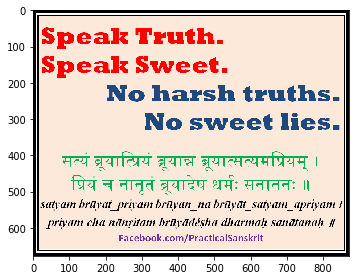

In [2]:
comp = imread('truth.png')
imshow(comp)

In [3]:
colors = [[0, 0, 0], [31, 73, 125], [255, 0, 0], [0, 176, 80], [112, 48, 160]]
imgs = []
for color in colors:
    img_color = np.zeros((comp.shape[0], comp.shape[1]), dtype=np.uint8)
    for i in range(comp.shape[0]):
        for j in range(comp.shape[1]):
            if comp[i, j, :].tolist() == color:
                img_color[i, j] = 255
    imgs.append(img_color)

In [4]:
class DSU:
    def __init__(self):
        self.parent = {}
        
    def find_parent(self, i): 
        if self.parent[i] == -1: 
            return i 
        if self.parent[i] != -1: 
            return self.find_parent(self.parent[i]) 

    def union(self, x, y): 
        x_set = self.find_parent(x) 
        y_set = self.find_parent(y)
        if x_set != y_set:
            self.parent[x_set] = y_set 

In [5]:
def get_neighbours(img, L, i, j):
    neighbours = []
    labels = []
    if i - 1 >= 0 and j - 1 >= 0:
        if img[i - 1, j - 1] == 255:
            neighbours.append(img[i - 1, j - 1])
            labels.append(L[i - 1, j - 1])
    if j - 1 >= 0:
        if img[i, j - 1] == 255:
            neighbours.append(img[i, j - 1])
            labels.append(L[i, j - 1])
    if i - 1 >= 0:
        if img[i - 1, j] == 255:
            neighbours.append(img[i - 1, j])
            labels.append(L[i - 1, j])
    if i - 1 >= 0 and j + 1 < img.shape[1]:
        if img[i - 1, j + 1] == 255:
            neighbours.append(img[i - 1, j + 1])
            labels.append(L[i - 1, j + 1])
            
    return neighbours, labels

In [6]:
def CCL(img):
    labels = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint)
    dsu = DSU()
    next_label = 1    
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            if img[row, column] == 255:
                neighbours, neighbours_labels = get_neighbours(img, labels, row, column)
                    
                if len(neighbours) == 0:
                    dsu.parent[next_label] = -1
                    labels[row, column] = next_label
                    next_label += 1

                else:
                    labels[row, column] = min(neighbours_labels)
                    for label in neighbours_labels:
                        dsu.union(label, labels[row, column])
    # Second Pass
    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            if img[row, column] != 0:
                labels[row, column] = dsu.find_parent(labels[row][column])

    unique_labels = np.unique(labels).tolist()
    return labels, len(unique_labels)

244
28
25
75
35


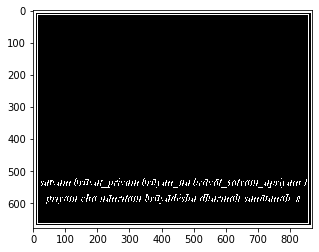

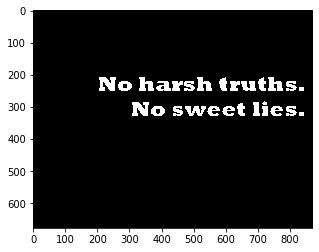

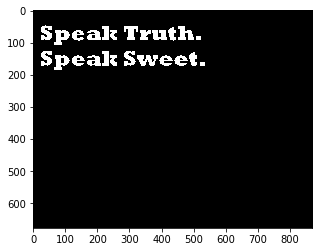

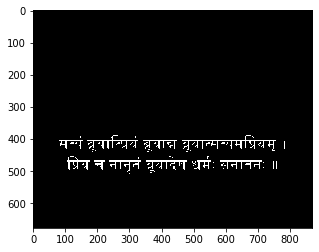

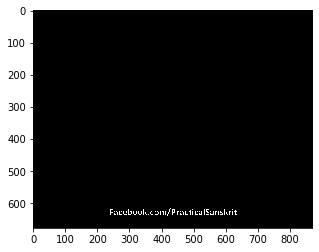

In [7]:
for img in imgs:
    plt.figure()
    plt.imshow(img, cmap="gray")
    _, n = CCL(img)
    print(n)

## part 2

/home/nive/.local/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


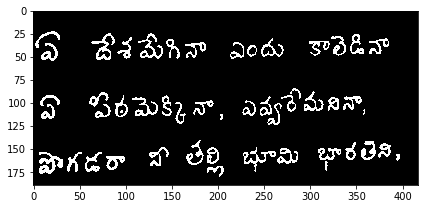

In [8]:
tel = util.img_as_ubyte(rgb2gray(imread('telugu.jpg',0)))[50:-100, 55:-130]
T = filters.threshold_otsu(tel)
new_tel = np.zeros(tel.shape, dtype=np.uint8)
new_tel[tel < T] = 255
new_tel[tel >= T] = 0
imshow(new_tel,cmap='gray')

In [9]:
def object_with_two_holes(image):
    contours, hierarchy = cv2.findContours(image,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    canvas = np.zeros(image.shape)
    two_hole = 0

    max_num = np.amax(hierarchy) +1
    for c, h in zip(contours, hierarchy[0]):
        if h[2] != -1:
            if h[0] == -1:

                num_interior_contours = max_num - h[2]
            else: num_interior_contours = h[0]-h[2]
        else: num_interior_contours = 0
        
        if num_interior_contours == 2:
            cv2.drawContours(canvas, [c], -1, (255), 2)
            two_hole += 1
    imshow(canvas,cmap = 'gray')
    return(two_hole)
def object_with_one_hole(image):
    contours, hierarchy = cv2.findContours(image,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    canvas = np.zeros(image.shape)
    one_hole = 0

    max_num = np.amax(hierarchy) +1
    for c, h in zip(contours, hierarchy[0]):
        if h[2] != -1:
            if h[0] == -1:

                num_interior_contours = max_num - h[2]
            else: num_interior_contours = h[0]-h[2]
        else: num_interior_contours = 0
        
        if num_interior_contours == 1:
            cv2.drawContours(canvas, [c], -1, (255), 2)
            one_hole += 1
    imshow(canvas,cmap = 'gray')
    return(one_hole)


/home/nive/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


number of letters with one hole:  31


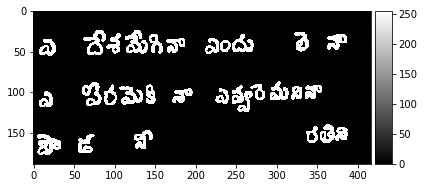

In [10]:
one_hole = object_with_one_hole(new_tel)
print("number of letters with one hole: ",one_hole)

number of letters with two hole:  7


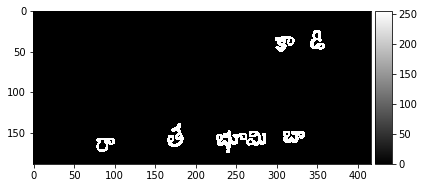

In [11]:
two_hole = object_with_two_holes(new_tel)
print("number of letters with two hole: ",two_hole)

(322, 467)


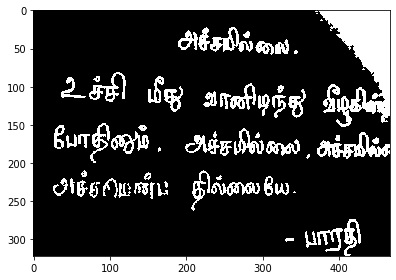

In [12]:
img = util.img_as_ubyte(rgb2gray(imread('next.jpg',0)))[50:-80, 55:-80]

T = filters.threshold_otsu(img)
im = np.zeros(img.shape, dtype=np.uint8)
im[img < T] = 255
im[img >= T] = 0
print(im.shape)
im = dilation(im)
imshow(im,cmap='gray')


number of letters with one hole:  8


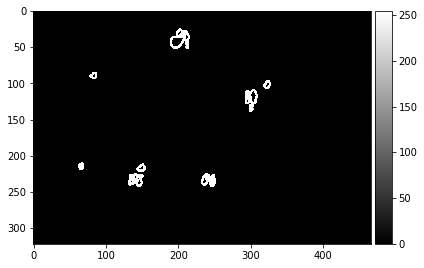

In [13]:
one_hole = object_with_one_hole(im)
print("number of letters with one hole: ",one_hole)

number of letters with two hole:  10


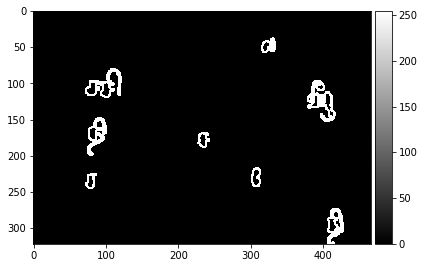

In [14]:
two_hole = object_with_two_holes(im)
print("number of letters with two hole: ",two_hole)